In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2
import utils
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
df = pd.read_csv('./data/diabetes_data.csv')
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [24]:
print(f'{"Column name":<20} {"Unique values":<10}')
for col in df.columns:
    print(f'{col:<20} {len(df[col].unique()):<10}')

Column name          Unique values
age                  51        
gender               2         
polyuria             2         
polydipsia           2         
sudden_weight_loss   2         
weakness             2         
polyphagia           2         
genital_thrush       2         
visual_blurring      2         
itching              2         
irritability         2         
delayed_healing      2         
partial_paresis      2         
muscle_stiffness     2         
alopecia             2         
obesity              2         
class                2         


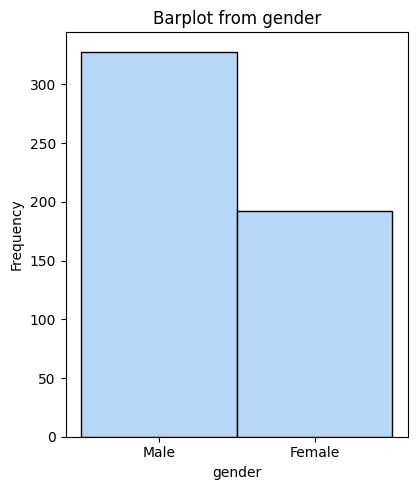

In [25]:
categ = df.select_dtypes(include=['object']).columns

n_cols = 4 
n_rows = math.ceil(len(categ) / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
colors = sns.color_palette("pastel", len(categ))

for i, col in enumerate(categ):
    sns.histplot(df[col], kde=False, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Barplot from {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig('barplots-categorical.png', format='png', dpi=300)
plt.show()


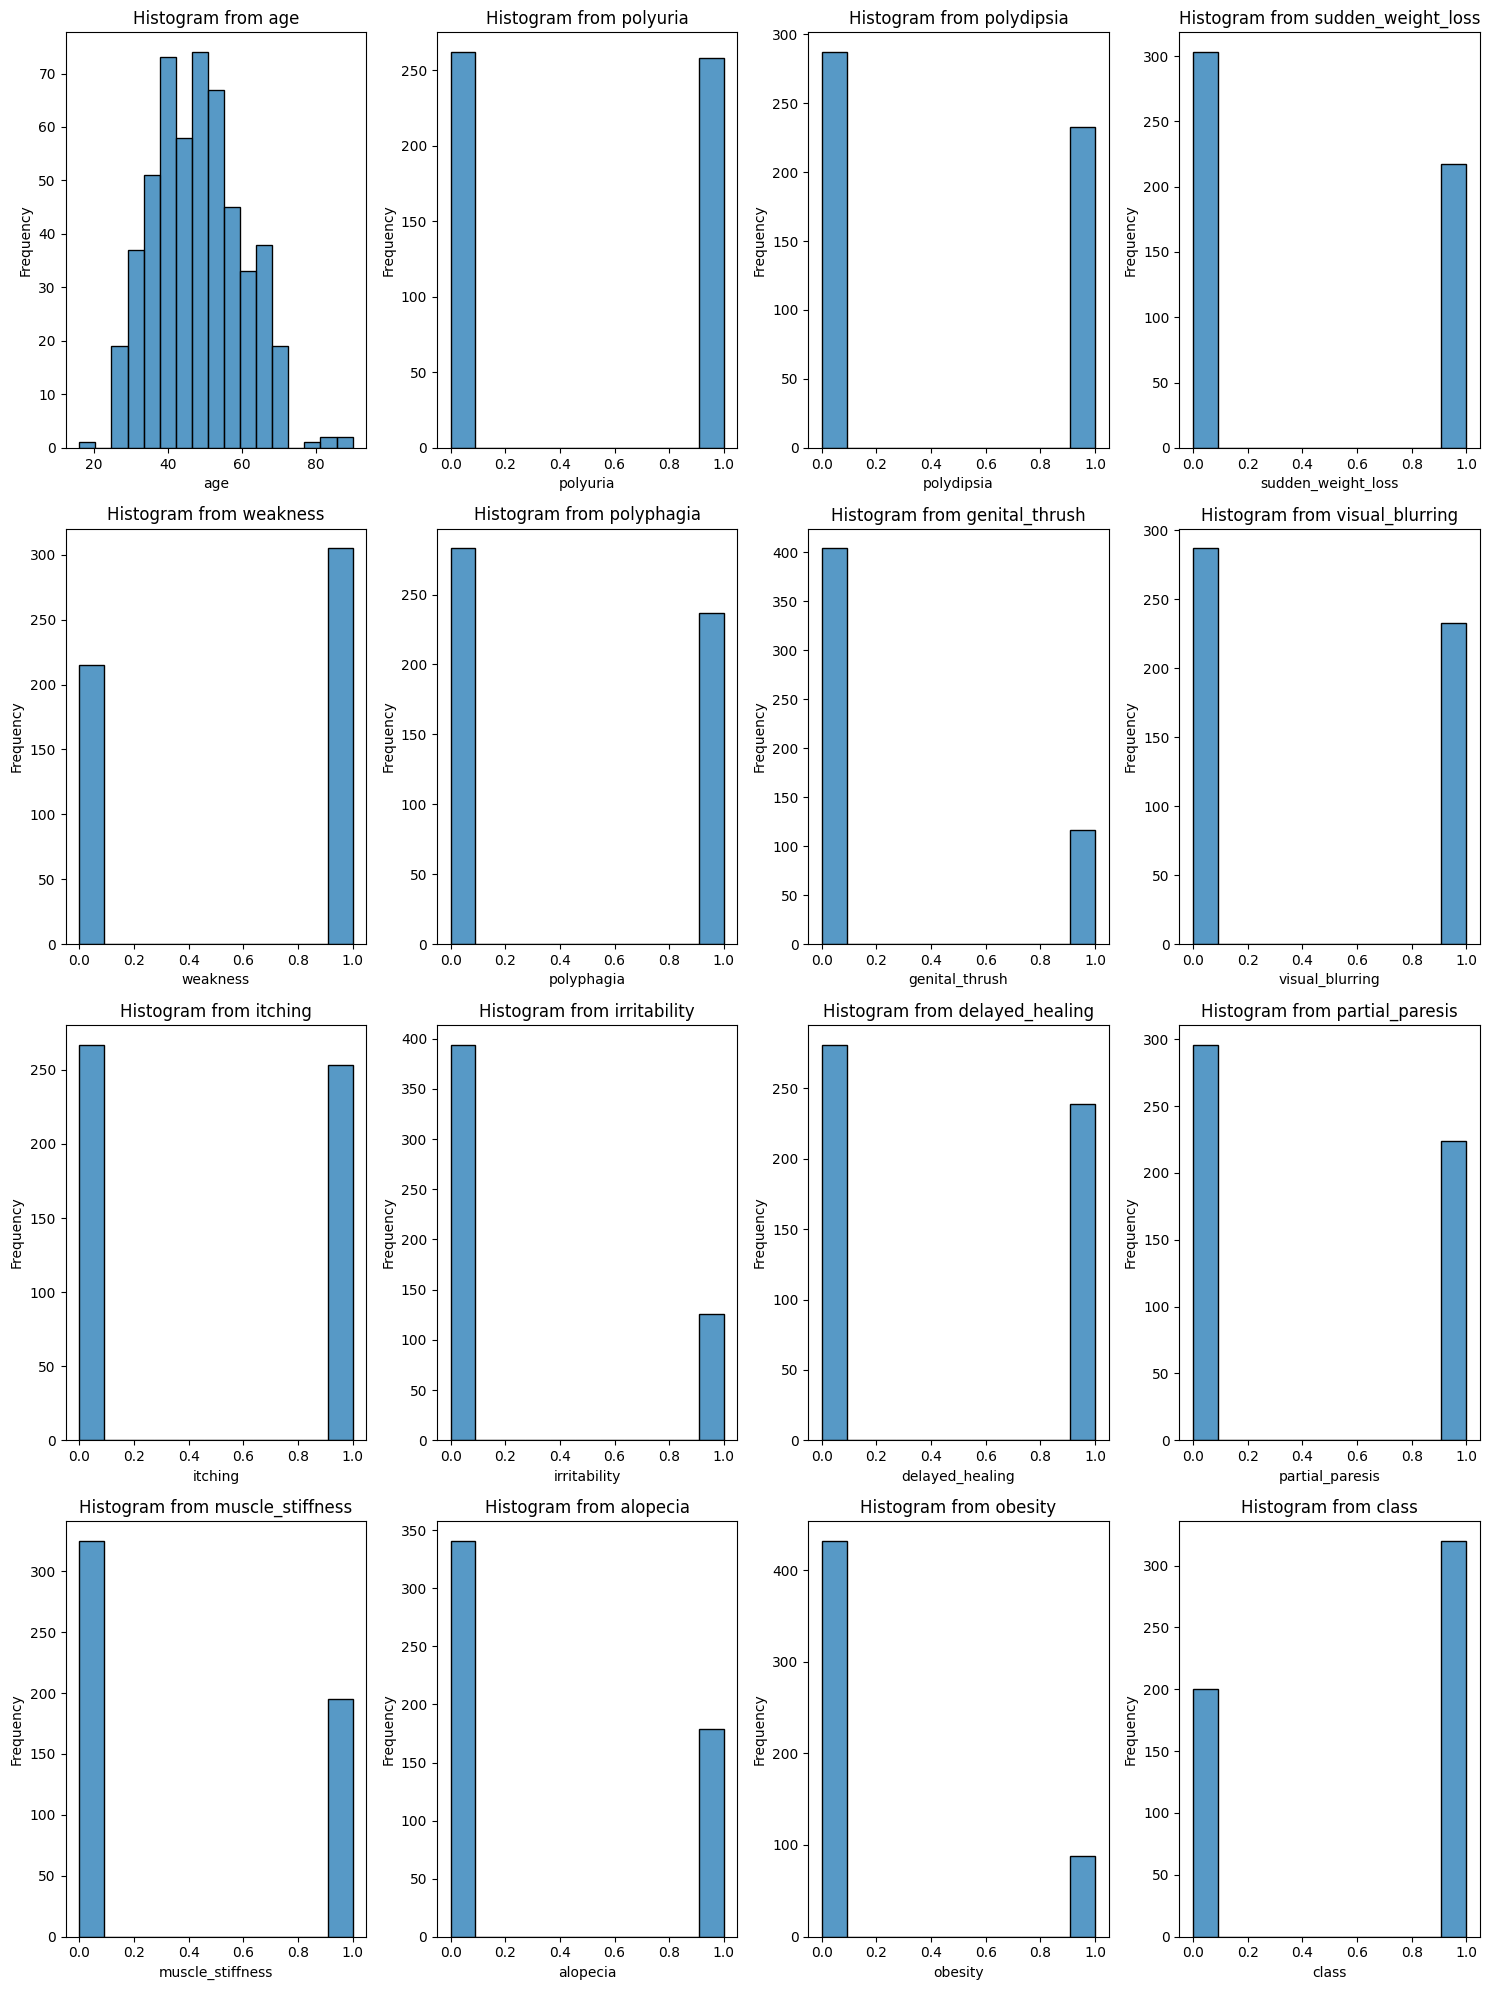

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

numeric_cols = df.select_dtypes(include=['number']).columns

n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram from {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('histograms-numerical.png', format='png', dpi=300)
plt.show()


## Checking missing values 

In [27]:
df.isna().any()

age                   False
gender                False
polyuria              False
polydipsia            False
sudden_weight_loss    False
weakness              False
polyphagia            False
genital_thrush        False
visual_blurring       False
itching               False
irritability          False
delayed_healing       False
partial_paresis       False
muscle_stiffness      False
alopecia              False
obesity               False
class                 False
dtype: bool

In [29]:
df.isnull().any()

age                   False
gender                False
polyuria              False
polydipsia            False
sudden_weight_loss    False
weakness              False
polyphagia            False
genital_thrush        False
visual_blurring       False
itching               False
irritability          False
delayed_healing       False
partial_paresis       False
muscle_stiffness      False
alopecia              False
obesity               False
class                 False
dtype: bool

## Transforming variables

In [16]:
# one-hot encoding for Yes/No 
yes_no_var = ['Ascites','Hepatomegaly','Spiders']
mapping_yes_no = {'Y':1, 'N':0}
df[yes_no_var] = df[yes_no_var].replace(mapping_yes_no)
df['Sex'] = df['Sex'].replace({'M':1, 'F':0})

# one-hot encoding for the rest of categorical data
categ_vars = ['Status', 'Drug', 'Edema']
df_clean = pd.get_dummies(df, columns=categ_vars, dtype=int)

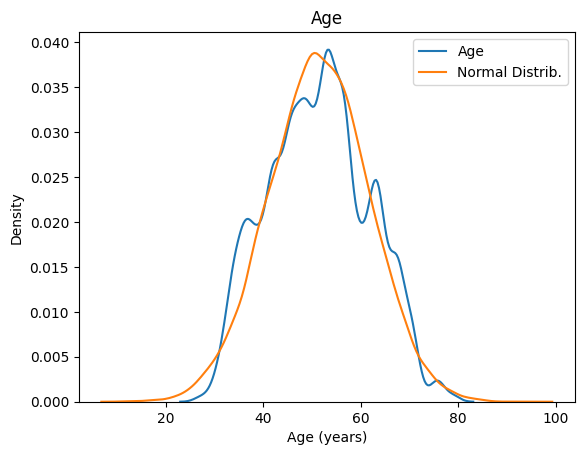

In [17]:
df_clean['Age'] = np.ceil(df_clean['Age']/365)
sns.kdeplot(df_clean['Age']) # to see ages in years instead of days
m = df_clean.Age.mean()
s = df_clean.Age.std()
norm = np.random.normal(m, s, len(df_clean['Age']))
sns.kdeplot(norm)
plt.legend(['Age', 'Normal Distrib.'])
plt.title('Age')
plt.xlabel('Age (years)')
plt.show() 

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                25000 non-null  int64  
 1   Age                   25000 non-null  float64
 2   Sex                   25000 non-null  object 
 3   Ascites               25000 non-null  object 
 4   Hepatomegaly          25000 non-null  object 
 5   Spiders               25000 non-null  object 
 6   Bilirubin             25000 non-null  float64
 7   Cholesterol           25000 non-null  float64
 8   Albumin               25000 non-null  float64
 9   Copper                25000 non-null  float64
 10  Alk_Phos              25000 non-null  float64
 11  SGOT                  25000 non-null  float64
 12  Tryglicerides         25000 non-null  float64
 13  Platelets             25000 non-null  float64
 14  Prothrombin           25000 non-null  float64
 15  Stage              

## EDA

### Correlation matrix

In [19]:
df_clean.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Edema_N,Edema_S,Edema_Y
N_Days,1.000000,-0.061922,-0.394799,-0.123461,0.368851,-0.281349,0.147792,-0.220532,-0.147606,0.115908,-0.149960,-0.309484,0.397869,-0.101524,-0.351704,0.090464,-0.090464,0.303430,-0.205304,-0.228199
Age,-0.061922,1.000000,0.005261,-0.035417,-0.109698,0.006087,0.029497,0.010857,0.029524,-0.125208,0.042543,0.165114,-0.055192,-0.102153,0.114227,-0.004627,0.004627,-0.105010,0.091646,0.043043
Bilirubin,-0.394799,0.005261,1.000000,0.339106,-0.283105,0.432199,0.112972,0.368024,0.379776,-0.095162,0.254145,0.168006,-0.419534,-0.001767,0.432119,-0.046757,0.046757,-0.304298,0.129293,0.362493
Cholesterol,-0.123461,-0.035417,0.339106,1.000000,-0.066418,0.129223,0.116131,0.322450,0.248305,0.008835,0.006194,0.025415,-0.150095,0.025660,0.139795,-0.009986,0.009986,0.018309,-0.008434,-0.020668
Albumin,0.368851,-0.109698,-0.283105,-0.066418,1.000000,-0.179171,-0.125686,-0.162569,-0.111661,0.118662,-0.215859,-0.231631,0.238620,0.028244,-0.261114,0.039801,-0.039801,0.215926,-0.066467,-0.301321
Copper,-0.281349,0.006087,0.432199,0.129223,-0.179171,1.000000,0.200772,0.281353,0.253358,-0.074730,0.141349,0.131763,-0.326815,0.062339,0.300748,-0.027728,0.027728,-0.143154,0.016731,0.247462
Alk_Phos,0.147792,0.029497,0.112972,0.116131,-0.125686,0.200772,1.000000,0.151769,0.129874,0.007922,0.072392,0.084407,-0.113062,-0.080239,0.161359,-0.005376,0.005376,-0.014554,0.006361,0.017028
SGOT,-0.220532,0.010857,0.368024,0.322450,-0.162569,0.281353,0.151769,1.000000,0.122173,-0.093752,0.133210,0.175301,-0.260527,0.024126,0.254142,-0.019675,0.019675,-0.171205,0.100837,0.154932
Tryglicerides,-0.147606,0.029524,0.379776,0.248305,-0.111661,0.253358,0.129874,0.122173,1.000000,-0.020636,0.027211,0.079228,-0.188861,0.048678,0.166673,-0.019693,0.019693,-0.118172,0.095830,0.061179
Platelets,0.115908,-0.125208,-0.095162,0.008835,0.118662,-0.074730,0.007922,-0.093752,-0.020636,1.000000,-0.156356,-0.250058,0.083755,0.018496,-0.096482,0.005776,-0.005776,0.109853,-0.055883,-0.114797


### Covariance matrix

In [15]:
'''cov = np.cov(df_clean)
cov'''

'cov = np.cov(df_clean)\ncov'

## Export clean data for model training

In [16]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['Stage'])
y = df_clean['Stage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
save = True
if save:
    X_train.to_csv('./data/X_train.csv', index=False)
    y_train.to_csv('./data/y_train.csv', index=False)
    X_test.to_csv('./data/X_test.csv', index=False)
    y_test.to_csv('./data/y_test.csv', index=False)